2024-10-05 11:30:46.577706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 11:30:47.301330: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/targets/x86_64-linux/lib:/usr/local/cuda/extras/CUPTI/lib64
2024-10-05 11:30:47.301502: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/targets/x86_64-linux/lib:/usr/loc

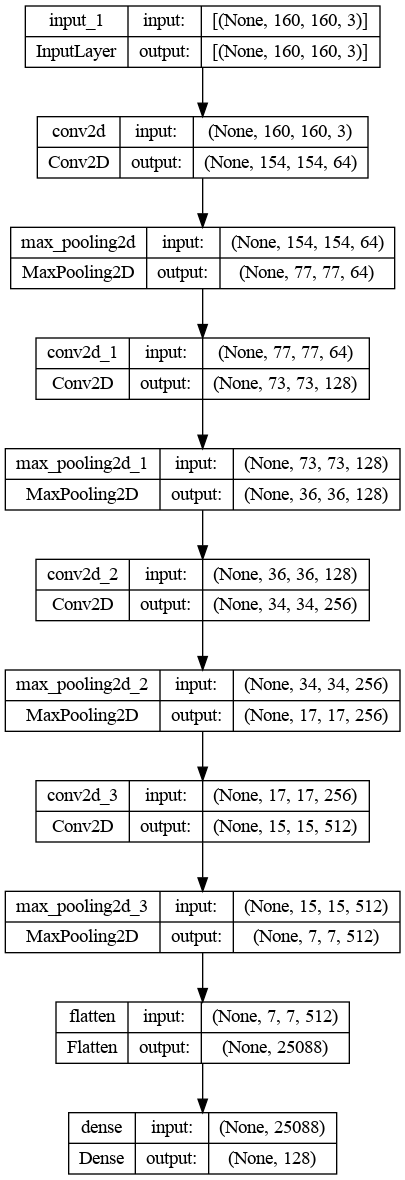

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

# Define the input size as 160x160x3 (FaceNet uses 160x160 RGB images)
input_layer = Input(shape=(160, 160, 3))

# First convolutional layer
x = Conv2D(64, (7, 7), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Second convolutional layer
x = Conv2D(128, (5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Third convolutional layer
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Fourth convolutional layer
x = Conv2D(512, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten the layers
x = Flatten()(x)

# Fully connected layer that outputs a 128-dimensional embedding
output_layer = Dense(128, activation=None)(x)

# Build the model
facenet_model = Model(inputs=input_layer, outputs=output_layer)

# Plot the model
plot_model(facenet_model, to_file='facenet_architecture.png', show_shapes=True, show_layer_names=True)
